In [79]:
import math  
import matplotlib.pyplot as plt

In [80]:
class point(object):
    def __init__(self, x,y):
        self.x=x
        self.y=y
        
    def getX(self):
        # Getter method for a Coordinate object's x coordinate.
        # Getter methods are better practice than just accessing an attribute directly
        return self.x

    def getY(self):
        # Getter method for a Coordinate object's y coordinate
        return self.y

    def __str__(self):
        return '<' + str(self.getX()) + ',' + str(self.getY()) + '>'
    
    def __eq__(self, other):
        return self.y == other.y and self.x == other.x
    
    def __repr__(self):
        return "Coordinate(%3.3f, %3.3f)" % (self.x, self.y)
    
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return math.sqrt(dx**2 + dy**2)
    
    def __add__(self,other):
        sum_x=self.x + other.x
        sum_y=self.y + other.y
        return point(sum_x,sum_y)
    
    def __sub__(self,other):
        dx=self.x - other.x
        dy=self.y - other.y
        return point(dx,dy)
    
    def scale(self,constant):
        return point(self.x*constant,self.y*constant)
    
    def __mul__(self,other):
        return self.x*other.x+self.y*other.y

In [81]:
def deviation_term(old,new,alpha):
    cost=0
    for i in range(1,len(old)-1):
        cost+=point.distance(old[i],new[i])**2
    return alpha*cost

In [82]:
def curvature_term(new,beta):
    cost=0
    for i in range(1,len(new)-1):
        cost+=(new[i+1]-new[i])*(new[i]-new[i-1])/(point.distance(new[i+1],new[i]))/(point.distance(new[i],new[i-1]))
    return -1*beta*cost

In [83]:
def boundary_term(new,left,right,theta,search=20):
    
    cost = 0
    
    for i in range(1,len(new)-1):
        
        if i < search:
            start = 0
        else:
            start=i-search
        
        if len(left)-1-i < search:
            end = len(left)
        else:
            end=i+search
        
        left_short=point.distance(left[start],new[i])
        for y in range(start, end):
            if point.distance(left[y],new[i]) < left_short:
                left_short = point.distance(left[y],new[i])
        
        
        if len(right)-1-i < search:
            end = len(right)
        else:
            end=i+search
        
        right_short=point.distance(right[start],new[i])
        for y in range(start, end):
            if point.distance(right[y],new[i]) < right_short:
                right_short = point.distance(right[y],new[i])

        cost+=1/left_short+1/right_short
    
    return theta*cost

In [84]:
def estimate_gradient(old, new, left, right, alpha, beta, theta,epsilon):
    
    gradient=[point(0,0)]
    
    for i in range(1,len(new)-1):
        
        new[i]=new[i]+point(epsilon,0)
        up_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)+boundary_term(new,left,right,theta)
        new[i]=new[i]+point(-2*epsilon,0)
        down_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)+boundary_term(new,left,right,theta)
        gradient_x = (up_cost-down_cost) / 2 / epsilon
        
        
        new[i]=new[i]+point(epsilon,epsilon)
        up_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)+boundary_term(new,left,right,theta)
        new[i]=new[i]+point(0,-2*epsilon)
        down_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)+boundary_term(new,left,right,theta)
        gradient_y = (up_cost-down_cost) / 2 / epsilon
        
        gradient.append(point(gradient_x,gradient_y))
    
    gradient.append(point(0,0))
    
    return gradient

In [103]:
def smoothing(points,left,right,alpha=1,beta=50,theta=100,epsilon=0.00001,step=0.0001,max_iteration=500,stop_error=6e-4):

    old=points.copy()
    new=points.copy()
    old_cost = 1000.0
    new_cost = 0.0
    
    i=0
    
    while abs(new_cost-old_cost) > stop_error and i < max_iteration:
        
        i+=1
        print("iteration: %d/%d | Error: %1.8f" %(i,max_iteration,new_cost-old_cost))
        
        old_cost=new_cost
        new_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)+boundary_term(new,left,right,theta)
        print('deviation term: %5.8f' %(deviation_term(old,new,alpha)))
        print('curvature term: %5.8f' %curvature_term(new,beta))
        print('boundary term: %5.8f' %boundary_term(new,left,right,theta))
        
        gradient = estimate_gradient(old, new, left,right, alpha, beta, theta, epsilon)
        for j in range(len(new)):
            new[j]-=point.scale(gradient[j],step)
        
    return new

Other useful functions

In [86]:
def add_points(old_x,old_y,dy=1):
    
    original_plus=[point(old_x[0],old_y[0])]
    
    for i in range(0,len(old_x)-1):
        z=(old_y[i+1] - old_y[i]) //dy
        if z==0:
            z=(old_x[i+1] - old_x[i]) //dy
    
        a_dx=(old_x[i+1] - old_x[i]) / z
        a_dy=(old_y[i+1] - old_y[i]) /z
        
        for y in range(1,int(z+1)):
            original_plus.append(point(old_x[i]+a_dx*y, old_y[i]+a_dy*y))
            
    return original_plus

In [87]:
def xy_to_points(old_x,old_y):
    original = []
    for i in range(len(original_x)):
        original.append(point(old_x[i],old_y[i]))
    return original

In [88]:
def points_to_xy(original):
    x=[]
    y=[]
    for i in range(len(original)):
        x.append(point.getX(original[i]))
        y.append(point.getY(original[i]))
    return [x,y]

Testing

In [97]:
old_y=[2, 6, 10, 14, 18, 22, 30, 34, 38, 42, 42, 42, 42, 42, 42]
old_x=[2, 2, 2, 2, 2, 2,6, 6, 6, 6, 10, 14, 18, 22, 26]

left_x=[0, 0, 0, 0, 0, 0, 0, 0, 0,4, 4, 4, 4, 8, 12, 16, 20, 24, 28]
left_y=[0, 4, 8, 12, 16, 20, 24, 28, 32,32, 36, 40, 44, 44, 44, 44, 44, 44, 44]

right_x=[4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 12, 16, 20, 24, 28]
right_y=[0, 4, 8, 12, 16, 20, 20, 24, 28, 32, 36, 40, 40, 40, 40, 40, 40]

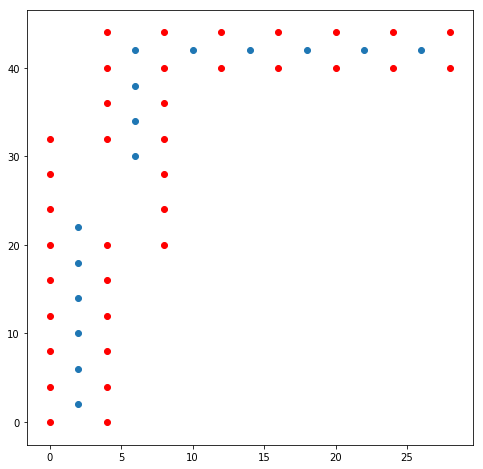

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(old_x,old_y)
plt.scatter(left_x, left_y, c='r')
plt.scatter(right_x, right_y, c='r')

In [99]:
original_plus=add_points(old_x,old_y)
left_plus=add_points(left_x,left_y)
right_plus=add_points(right_x,right_y)

x_plus=points_to_xy(original_plus)[0]
y_plus=points_to_xy(original_plus)[1]

left_x_plus=points_to_xy(left_plus)[0]
left_y_plus=points_to_xy(left_plus)[1]

right_x_plus=points_to_xy(right_plus)[0]
right_y_plus=points_to_xy(right_plus)[1]

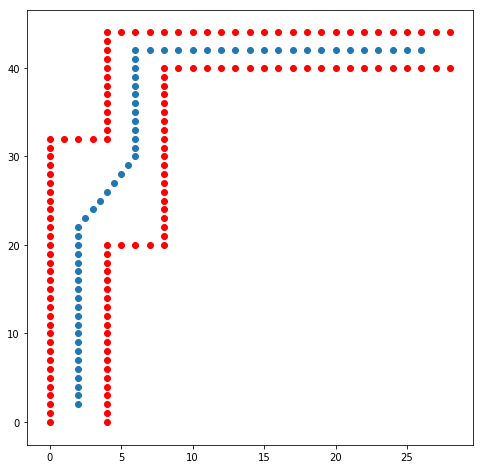

In [100]:
plt.figure(figsize=(8,8))
plt.scatter(x_plus,y_plus)
plt.scatter(left_x_plus, left_y_plus, c='r')
plt.scatter(right_x_plus, right_y_plus, c='r')

In [108]:
new=smoothing(original_plus,left_plus,right_plus,theta=10,beta=100,stop_error=0.5,max_iteration=100)

iteration: 1/100 | Error: -1000.00000000
deviation term: 0.00000000
curvature term: -5778.88543820
boundary term: 554.13410280
iteration: 2/100 | Error: -5224.75133540
deviation term: 0.00060896
curvature term: -5784.80961897
boundary term: 554.12917518
iteration: 3/100 | Error: -5.92849944
deviation term: 0.00230939
curvature term: -5790.14667376
boundary term: 554.12526320
iteration: 4/100 | Error: -5.33926633
deviation term: 0.00493687
curvature term: -5794.98710662
boundary term: 554.12140469
iteration: 5/100 | Error: -4.84166391
deviation term: 0.00835495
curvature term: -5799.40312198
boundary term: 554.11834688
iteration: 6/100 | Error: -4.41565508
deviation term: 0.01244871
curvature term: -5803.45225596
boundary term: 554.11517535
iteration: 7/100 | Error: -4.04821176
deviation term: 0.01712013
curvature term: -5807.18027256
boundary term: 554.11242527
iteration: 8/100 | Error: -3.72609526
deviation term: 0.02228399
curvature term: -5810.62371900
boundary term: 554.10949434
it

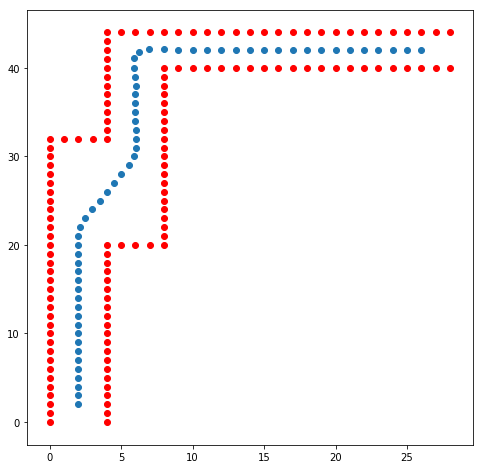

In [109]:
x_plus=points_to_xy(new)[0]
y_plus=points_to_xy(new)[1]
plt.figure(figsize=(8,8))
plt.scatter(x_plus,y_plus)
plt.scatter(left_x_plus, left_y_plus, c='r')
plt.scatter(right_x_plus, right_y_plus, c='r')